In [54]:
import pandas
import sklearn.preprocessing

# bank.csv from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

bank = pandas.read_csv('bank.csv', sep=';')

# Ordinal features
#
# Note: month probably shouldn't be ordinal.
# Then again, neither should day.

boolean = { 'no': 0.0, 'yes': 1.0 }
months = {
    'jan': 1.0, 'feb': 2.0, 'mar': 3.0, 'apr': 4.0,  'may': 5.0,  'jun': 6.0,
    'jul': 7.0, 'aug': 8.0, 'sep': 9.0, 'oct': 10.0, 'nov': 11.0, 'dec': 12.0
}

bank.replace({
    'default': boolean,
    'housing': boolean,
    'loan':    boolean,
    'month':   months,
    'y':       boolean
}, inplace=True)

# Categorical features
#
# Since we plan to use logistic regression, add drop_first=True
# to use dummy instead of one-hot encoding

categorical = ['job', 'marital', 'education', 'contact', 'poutcome']
bank = pandas.get_dummies(bank, columns=categorical, prefix=categorical, drop_first=True)

# Numeric features
#
# Standardized because we plan to use KNN and SVM 

scaled = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
bank[scaled] = sklearn.preprocessing.scale(bank[scaled].astype(float))

# Training set and targets

X = bank.drop(columns='y').values
t = bank['y'].values


[[-1.05626965  0.          0.12107186 ...  0.          0.
   1.        ]
 [-0.77258281  0.          1.1186443  ...  0.          0.
   0.        ]
 [-0.58345826  0.         -0.02414438 ...  0.          0.
   0.        ]
 ...
 [ 1.49691189  0.         -0.37472364 ...  0.          0.
   1.        ]
 [-1.24539421  0.         -0.09492484 ...  1.          0.
   0.        ]
 [ 0.26760226  0.         -0.09525714 ...  1.          0.
   0.        ]]


array([[1.05626965, 0.        , 0.12107186, ..., 0.        , 0.        ,
        1.        ],
       [0.77258281, 0.        , 1.1186443 , ..., 0.        , 0.        ,
        0.        ],
       [0.58345826, 0.        , 0.02414438, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.49691189, 0.        , 0.37472364, ..., 0.        , 0.        ,
        1.        ],
       [1.24539421, 0.        , 0.09492484, ..., 1.        , 0.        ,
        0.        ],
       [0.26760226, 0.        , 0.09525714, ..., 1.        , 0.        ,
        0.        ]])

In [95]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

data = pd.read_csv("bank.csv")

# print(X)
# print(t)

xTrain, xTest, yTrain, yTest = train_test_split(X, t, test_size = 0.2, random_state = 0)
# xTrain = xTrain.values.reshape(-1, 1)
# xTest = xTest.values.reshape(-1, 1)
# yTrain = yTrain.values.reshape(-1, 1)
# yTest = yTest.values.reshape(-1, 1)

# print(xTrain)
# print(xTest)
# print(yTrain)
# print(yTest)
clf = GaussianNB()
clf.fit(xTrain, yTrain)
clf.score(X, t)

nb = MultinomialNB()
nb.fit(abs (xTrain), yTrain)
y_pred = nb.predict(xTest)

print(accuracy_score(yTest, y_pred))

cm= confusion_matrix(yTest, y_pred)

0.8906077348066298


In [96]:
print(confusion_matrix(yTest, y_pred))

[[782  11]
 [ 88  24]]


In [97]:
from sklearn.metrics import classification_report
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       793
         1.0       0.69      0.21      0.33       112

   micro avg       0.89      0.89      0.89       905
   macro avg       0.79      0.60      0.63       905
weighted avg       0.87      0.89      0.86       905



In [98]:
y_pred_prob = nb.predict_proba(xTest)[:,1]

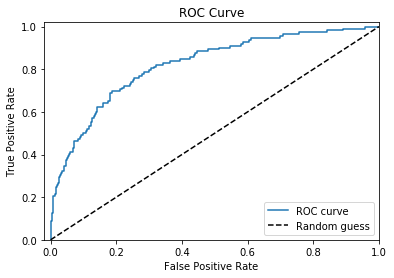

In [99]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(yTest, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [100]:
from sklearn.metrics import roc_auc_score
roc_auc_score(yTest, y_pred_prob)

0.819784723473248

In [101]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(fit_intercept=False)
logisticRegr.fit(xTrain, yTrain)
logisticRegr.predict(xTest[0].reshape(1,-1))

C:\Users\darsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.])

In [102]:
logisticRegr.predict(xTest[0:10])
predictions = logisticRegr.predict(xTest)

In [103]:
score = logisticRegr.score(xTest, yTest)
print(score)

0.8950276243093923
